In day 3, I'm going to create a model to classify movie reviews using a binary classification which is the most common kinds of machine learning problems.

* The dataset is from IMDB which comes with Keras package.
* The dataset contains 50,000 reviews from Internet which can split to 25,000 train data and 25,000 test data. Each split contain 50% of negative and 50% positive reviews.
* The data in package is already preprocessing. So, this practice will focus only model building, training and evaluation

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000) # keep the top 10,000 most frequently occured words

In [4]:
print(train_data[0]) # each review is a list of word indices (squence of words)
print(train_labels[0]) # negative = 0, positive = 1

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [7]:
# As restricted only 10,000 words. The index must not exceed 10,000 (0 - 9999)
max([max(sequence) for sequence in train_data])

9999

In [9]:
word_index = imdb.get_word_index() # a dictionary mapping words to integer index
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) # reverse it mapping indices to words
decoded_review = " ".join(
    [reverse_word_index.get( i - 3, "?") for i in train_data[0]]) # decodes the review. 
#Note: indices are offset by 3 because 0, 1, 2 are reserved indices for "padding", "start of sequence", " unknown"

## Preprocessing data

We can't feed lists of integers into a neural network directly as they have different lengths. Neural network expect to process contiguous batches of data. The list have to turn into tensors for further processing

In [11]:
# Encoding the integer sequences via multi-hot encoding
import numpy as np
def vectorize_sequences(seqeunces, dimension = 10000):
    results = np.zeros((len(seqeunces), dimension))
    for i, sequence in enumerate(seqeunces):
        for j in sequence:
            results[i, j] = 1.  #sets specific indices of result[i] to 1s
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

## building your model

input data: vectors
labels: scalar (1s and 0s)
the best activation func. to apply for this problem is Relu with a densely connected (fully connect)

* The problem assigns us to use two intermediate layers with 16 units each
* The third layer will output the scalar prediction (1 units)

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
                          layers.Dense(16, activation = "relu"),
                          layers.Dense(16, activation = "relu"),
                          layers.Dense(1, activation = "sigmoid") # Binary classification
])

In [16]:
# compilling the model
# use Crossentropy as a loss func.
# use optimizer as rmsprop
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

## Validating approach

In [17]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
# train 20 epochs of mini batch 512 samples
# monitor loss and accuracy on the 10,000 sample
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 69ms/step - loss: 0.5094 - accuracy: 0.7846 - val_loss: 0.3783 - val_accuracy: 0.8710
Epoch 2/20
30/30 [==============================] - 1s 49ms/step - loss: 0.3022 - accuracy: 0.9043 - val_loss: 0.3172 - val_accuracy: 0.8796
Epoch 3/20
30/30 [==============================] - 1s 48ms/step - loss: 0.2224 - accuracy: 0.9275 - val_loss: 0.2773 - val_accuracy: 0.8906
Epoch 4/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1703 - accuracy: 0.9443 - val_loss: 0.3054 - val_accuracy: 0.8792
Epoch 5/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1346 - accuracy: 0.9585 - val_loss: 0.2903 - val_accuracy: 0.8871
Epoch 6/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1157 - accuracy: 0.9640 - val_loss: 0.3006 - val_accuracy: 0.8854
Epoch 7/20
30/30 [==============================] - 1s 49ms/step - loss: 0.0960 - accuracy: 0.9717 - val_loss: 0.3167 - val_accuracy: 0.8815
Epoch 8/20
30

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

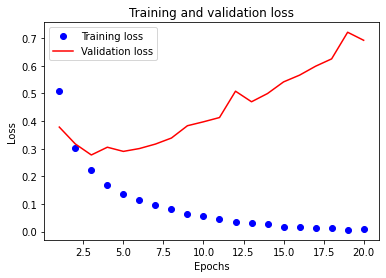

In [21]:
# plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label = "Training loss") # "bo" = "blue dot"
plt.plot(epochs, val_loss_values, "r", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

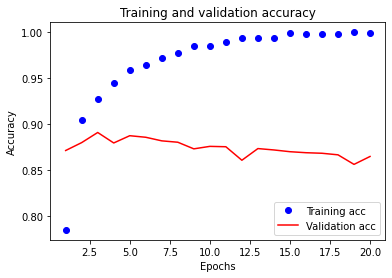

In [22]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" = "blue dot"
plt.plot(epochs, val_acc, "r", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

From those 2 graphs, we can see that the increased epoch makes the loss of data decreases and the accuray of train data increase. However, for validation data, it is oppisite from the train data. This problem tells us that our model is "Overfitting"

In this case, we should stop training at 4 epochs to mitigate overfitting. (there is another way to reduce overfitting, but it is cover it other chapter.)

In [23]:
model = keras.Sequential([
                          layers.Dense(16, activation = "relu"),
                          layers.Dense(16, activation = "relu"),
                          layers.Dense(1, activation = "sigmoid")
])

model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 2s 33ms/step - loss: 0.4370 - accuracy: 0.8287
Epoch 2/4
49/49 [==============================] - 2s 33ms/step - loss: 0.2540 - accuracy: 0.9108
Epoch 3/4
49/49 [==============================] - 2s 33ms/step - loss: 0.1988 - accuracy: 0.9284
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2928 - accuracy: 0.8839


In [26]:
# 0.29 is the test loss
# 0.88 is the accuracy loss
results

[0.29277336597442627, 0.8838800191879272]

In [28]:
# test on new data
model.predict(x_test)

array([[0.26624185],
       [0.9998356 ],
       [0.9043993 ],
       ...,
       [0.10862574],
       [0.06352964],
       [0.53965104]], dtype=float32)

From prediction, we can see that the model is confident for some samples (0.99 or more, 0.01 or less) but less confident for others (0.5)